In [10]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

In [6]:
# 1. Loading the Dataset
# The Breast Cancer dataset is a classic binary classification dataset from scikit-learn.
# It contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
# The task is to predict whether the mass is malignant (1) or benign (0).
data = load_breast_cancer()
X = data.data
y = data.target

In [7]:
# 2. Preprocess the Dataset
# 2.1. Train-Test Split
# I split the data into training and testing sets to evaluate the model's performance on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 2.2. Feature Scaling
# Neural networks are sensitive to the scale of input features.
# I use StandardScaler to scale the data to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# 3. Build the Feedforward Neural Network
# I will build a sequential model with two hidden layers.
# - The input layer will have the same number of neurons as the number of features.
# - The hidden layers will use the ReLU activation function.
# - The output layer will have a single neuron with a sigmoid activation function for binary classification.
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit Input layer
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
# Compile the model
# - I use the 'adam' optimizer, which is an efficient gradient descent algorithm.
# - The loss function is 'binary_crossentropy', suitable for binary classification.
# - I will track 'accuracy' as a metric.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# 4. Train the Model
# I train the model on the training data for a specified number of epochs.
# An epoch is one complete pass through the entire training dataset.
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [15]:
# 5. Evaluate the Model on the Test Set
# I use the trained model to make predictions on the test set.
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [16]:
# 5.1. Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [17]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9737
Precision: 0.9595
Recall: 1.0000
F1-score: 0.9793


In [18]:
# 5.2. Confusion Matrix
# The confusion matrix gives a detailed breakdown of correct and incorrect classifications.
cm = confusion_matrix(y_test, y_pred)

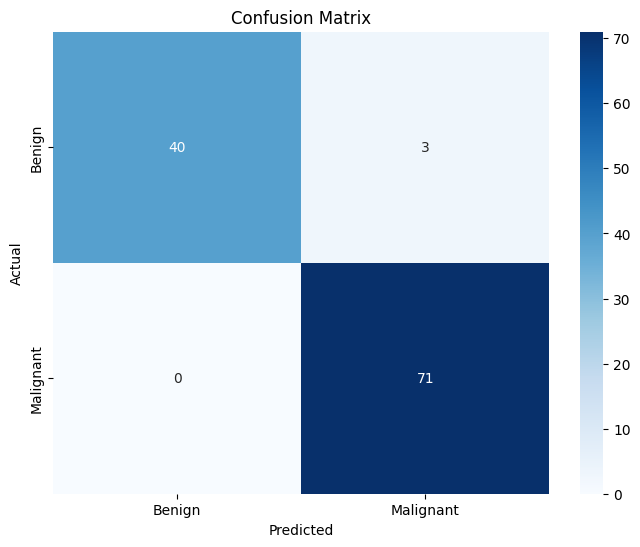

In [19]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

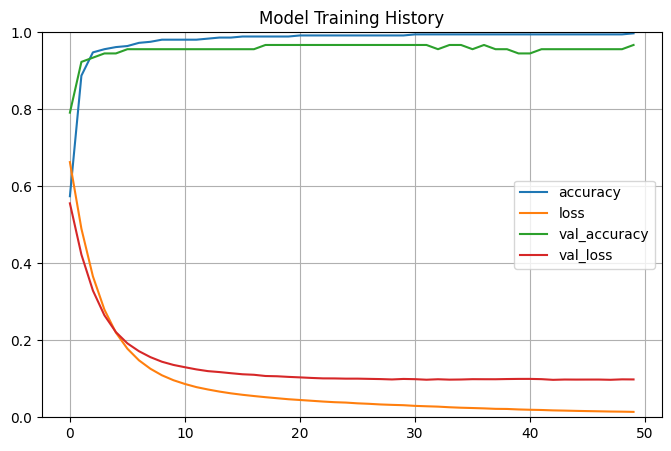

In [21]:

# 6. Plotting Training History (Optional)
# This helps to visualize the model's performance during training.
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Model Training History')
plt.show()